In [1]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Bibliotecas dos Modelos Utilizados
from sklearn.linear_model import LogisticRegression  # Regressão Logística.
from sklearn.svm import SVC                          # Máquinas de Vetores de Suporte (SVM).
from sklearn.neighbors import KNeighborsClassifier   # K-Vizinhos Mais Próximos
from sklearn.tree import DecisionTreeClassifier      # Árvore de Decisões de Classificação.
from sklearn.ensemble import RandomForestClassifier  # Floresta Aleatória.
from xgboost import XGBClassifier                    # Extreme Gradient Boosting.

In [3]:
# Análise de Dados
from sklearn.decomposition import PCA

# Treinamento
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Avalição
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import label_binarize

# Tuning
from sklearn.model_selection import GridSearchCV

# Análise de Dados

In [4]:
# Carregar o DataFrame a partir de um arquivo Excel
caminho_arquivo_excel = 'C:\\Users\\Andre\\Desktop\\Julia\\Mangue_Baja\\DESAFIO TÉCNICO\\anonymizedData.xlsx'
nome_da_pagina = 'P_Aceleration'  # Nome da página desejada

# Lê o arquivo Excel com todas as páginas/sheets
xl = pd.ExcelFile(caminho_arquivo_excel)

df = xl.parse(nome_da_pagina)

# Vê dados 
df.head()

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,DP_Altura do CG com relacao ao chao,MV_Eixo dianteiro,MV_Eixo Traseiro,DMV_Dianteira,DMV_Lado Direito,...,CD_Distancia de frenagem de 35 a 0 em asfalto,CD_Distancia de frenagem de 35 a 0 em terra batida,CD_Ganho de rolagem por aceleracao lateral,CD_Ganho de arfagem em aceleracao longitudinal,CD_Ganho de arfagem em desaceleracao longitudinal,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao
0,1409.565056,1291.374765,1127.937101,1663.806440,2056.763003,NaN,77.103974,95.577887,0.454945,0.500616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1507.926208,1309.115732,1242.659913,1530.587966,2098.250774,NaN,71.061984,91.039134,0.409187,NaN,...,NaN,NaN,NaN,NaN,NaN,53.401821,47.982676,5.691769,10.846115,1
2,1513.425447,1301.218322,1241.176354,1669.921950,2135.010554,NaN,72.050229,93.021177,0.415841,NaN,...,NaN,NaN,NaN,NaN,NaN,51.888566,51.800628,6.321324,4.606555,1
3,1369.669287,1262.398125,1180.965717,1368.187563,1987.070532,550.848527,102.342058,152.610215,0.434121,0.588756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1384.641327,1362.557218,1171.793778,1654.978161,1976.940021,NaN,84.700554,102.049056,0.457152,NaN,...,NaN,NaN,NaN,NaN,NaN,46.084792,42.528714,12.293491,4.819045,1


In [5]:
# Remove as colunas que não trazem dados relevantes as provas
colunas_a_remover = [
    'DP_Entre-Eixo',
    'DP_Bitola Dianteira',
    'DP_Bitola Traseira',
    'DP_Altura',
    'DP_Comprimento',
    'DP_Altura do CG com relacao ao chao',
    'DMV_Lado Direito',
    'ST_Curso Positivo de projeto',
    'SD_Curso Positivo de projeto',
    'SD_Curso Negativo de projeto',
    'ST_Curso Negativo de projeto',
    'D_Relacao',
    'D_Curso total da cremalheira',
    'D_Inclinacao do pino mestre',
    'D_Angulo de caster',
    'FD_Pressao no sistema a 07g ',
    'FD_Forca no pedal a 07g ',
    'FD_Curso total do pedal ',
    'FD_Diametro do disco ',
    'FT_Pressao no sistema a 07g ',
    'FT_Diametro do disco ',
    'CD_Raio mínimo de curva do protótipo',
    'CD_Velocidade crítica para uma curva de raio de 10 m',
    'CD_Distancia de frenagem de 35 a 0 em asfalto',
    'CD_Distancia de frenagem de 35 a 0 em terra batida',
    'CD_Ganho de rolagem por aceleracao lateral',
    'CD_Ganho de arfagem em aceleracao longitudinal',
    'CD_Ganho de arfagem em desaceleracao longitudinal'
]

# Remove as colunas especificadas
df = df.drop(colunas_a_remover, axis=1)

In [6]:
# Informação básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   MV_Eixo dianteiro                                        735 non-null    float64
 1   MV_Eixo Traseiro                                         735 non-null    float64
 2   DMV_Dianteira                                            735 non-null    float64
 3   PCG_X                                                    735 non-null    float64
 4   PCG_Y                                                    960 non-null    float64
 5   PCG_Z                                                    735 non-null    float64
 6   SD_Dimensoes dos pneus                                   1000 non-null   int64  
 7   SD_Cambagem estatica                                     216 non-null    float64
 8   SD_Convergência estatica     

In [7]:
#Descrição de dados
df.describe()

,MV_Eixo dianteiro,MV_Eixo Traseiro,DMV_Dianteira,PCG_X,PCG_Y,PCG_Z,SD_Dimensoes dos pneus,SD_Cambagem estatica,SD_Convergência estatica,ST_Dimensoes dos pneus,...,ST_Convergência estatica,MT_Potência maxima do motor,MT_Torque maximo do motor,MT_Relacao total_max,MT_Relacao total_min,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao
count,735.000000,735.000000,735.000000,735.000000,960.000000,735.000000,1000.0000,216.000000,170.000000,1000.000000,...,195.000000,278.000000,282.000000,762.000000,750.000000,367.000000,349.000000,331.000000,316.000000,1000.000000
mean,75.689672,105.300940,0.417602,297.782145,125.762952,-358.802033,5.6000,-0.011381,-0.049874,5.651000,...,-0.333717,7.047571,19.204441,28.739325,5.819933,51.528302,48.531720,7.251006,8.012719,3.000000
std,12.781378,15.142636,0.027923,246.958884,214.987695,9107.607423,9.5385,1.277322,0.547005,9.623087,...,1.246190,0.377254,0.917071,5.762861,1.160649,5.263468,4.883164,3.563550,4.139160,1.414921
min,49.346397,74.999317,0.321092,-280.395678,-82.802037,-160203.550648,0.0000,-10.000000,-2.000000,0.000000,...,-10.000000,5.472237,15.152607,3.643553,0.517054,41.583219,34.741983,3.640547,2.986824,1.000000
25%,68.147729,95.428569,0.399338,94.227025,-1.321509,155.959486,0.0000,-0.016112,0.000000,0.000000,...,0.000000,6.792913,18.671068,26.000181,5.138121,47.571847,44.806923,4.511780,4.948673,2.000000
50%,73.172271,102.824884,0.418073,210.522937,4.331575,254.004146,0.0000,0.000000,0.000000,0.000000,...,0.000000,7.082673,18.952974,28.902849,5.750081,50.919169,48.639728,6.329295,6.734602,3.000000
75%,81.768813,110.446444,0.439680,523.012777,178.381726,390.499593,21.0000,0.000000,0.000000,21.000000,...,0.000000,7.344294,19.567024,31.732720,6.566662,55.015397,52.249066,8.929033,9.823008,4.000000
max,131.054554,170.655014,0.479293,861.160830,978.086870,951.530932,23.0000,4.282447,5.000000,23.000000,...,0.000000,7.780000,23.000176,45.709112,9.788617,69.516951,58.775697,25.359216,28.982584,5.000000


In [8]:
# Inicialize um dicionário para armazenar o número de zeros em cada coluna
contagem_zeros = {}

# Loop através de todas as colunas
for coluna in df.columns:
    # Use a função sum() para contar a quantidade de zeros (0) na coluna
    zeros_na_coluna = (df[coluna] == 0).sum()
    
    # Armazene o resultado no dicionário
    contagem_zeros[coluna] = zeros_na_coluna

# Exiba a contagem de zeros em cada coluna
for coluna, zeros in contagem_zeros.items():
    print(f"'{coluna}' tem {zeros}.") 

'MV_Eixo dianteiro' tem 0.
'MV_Eixo Traseiro' tem 0.
'DMV_Dianteira' tem 0.
'PCG_X' tem 0.
'PCG_Y' tem 46.
'PCG_Z' tem 0.
'SD_Dimensoes dos pneus' tem 743.
'SD_Cambagem estatica' tem 133.
'SD_Convergência estatica' tem 146.
'ST_Dimensoes dos pneus' tem 743.
'ST_Cambagem estatica' tem 131.
'ST_Convergência estatica' tem 148.
'MT_Potência maxima do motor' tem 0.
'MT_Torque maximo do motor' tem 0.
'MT_Relacao total_max' tem 0.
'MT_Relacao total_min' tem 0.
'CD_Velocidade maxima de 0 a 100 metros em asfalto ' tem 0.
'CD_Velocidade maxima de 0 a 100 metros em terra batida ' tem 0.
'CD_Tempo para atingir velocidade maxima em asfalto' tem 0.
'CD_Tempo para atingir velocidade maxima em terra batida' tem 0.
'P_Aceleracao' tem 0.


## Limpeza

In [9]:
# Limpar o Dataset das colunas com muitos valores nulos

limite_nulos = 700 # Define o limite de valores nulos permitidos

# Remove as colunas com mais de limite_nulos valores nulos
df = df.dropna(thresh=len(df) - limite_nulos, axis=1)

# Checar 
df.isnull().sum()

MV_Eixo dianteiro                                          265
MV_Eixo Traseiro                                           265
DMV_Dianteira                                              265
PCG_X                                                      265
PCG_Y                                                       40
PCG_Z                                                      265
SD_Dimensoes dos pneus                                       0
ST_Dimensoes dos pneus                                       0
MT_Relacao total_max                                       238
MT_Relacao total_min                                       250
CD_Velocidade maxima de 0 a 100 metros em asfalto          633
CD_Velocidade maxima de 0 a 100 metros em terra batida     651
CD_Tempo para atingir velocidade maxima em asfalto         669
CD_Tempo para atingir velocidade maxima em terra batida    684
P_Aceleracao                                                 0
dtype: int64

In [10]:
# Verifique quais linhas têm mais de 8 valores iguais nulos
linhas_quase_nulas = df[df.isnull().sum(axis=1) > 8]

# Exiba as linhas que atendem à condição
print(linhas_quase_nulas.index)

# Exclua as linhas com base nos índices coletados
df = df.drop(linhas_quase_nulas.index)

# Exiba o DataFrame resultante
print(df)

Int64Index([206, 209, 211, 212, 213, 217, 221, 225, 228, 229,
            ...
            980, 983, 984, 985, 987, 989, 990, 993, 994, 999],
           dtype='int64', length=265)
     MV_Eixo dianteiro  MV_Eixo Traseiro  DMV_Dianteira       PCG_X  \
0            77.103974         95.577887       0.454945  208.702782   
1            71.061984         91.039134       0.409187  514.604278   
2            72.050229         93.021177       0.415841  491.093155   
3           102.342058        152.610215       0.434121   85.197422   
4            84.700554        102.049056       0.457152  368.632469   
..                 ...               ...            ...         ...   
992          65.232887         93.529321       0.404373   96.678853   
995          72.221809         90.226812       0.441886  107.916108   
996          70.709528         98.908065       0.401583   69.576836   
997          60.558489        107.230112       0.352453  523.000000   
998          69.774043         96.836258

In [11]:
# Pela análise dos dados se percebe que as colunas de Dimensões de Pneus trazem muitos valores zerados
df = df.drop(['SD_Dimensoes dos pneus'], axis=1)
df = df.drop(['ST_Dimensoes dos pneus'], axis=1)

In [12]:
# Mapeie os valores existentes para os novos valores
mapeamento = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

# Use a função 'replace' para fazer a substituição
df['P_Aceleracao'] = df['P_Aceleracao'].replace(mapeamento)

print(df['P_Aceleracao'])

0      0
1      0
2      0
3      0
4      0
      ..
992    4
995    4
996    4
997    4
998    4
Name: P_Aceleracao, Length: 735, dtype: int64


In [13]:
# Especifique o caminho para o arquivo Excel
caminho_arquivo = "C:\\Users\\Andre\\Desktop\\Julia\\Mangue_Baja\\DESAFIO TÉCNICO\\Arquivo_Processado.xlsx"

# Salvar o DataFrame na planilha 'P_Aceleration'
df.to_excel(caminho_arquivo, sheet_name='P_Aceleration', index=0)

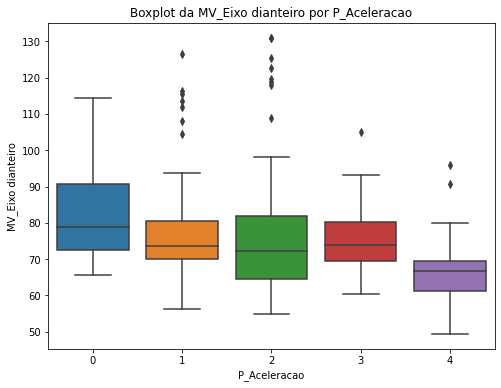

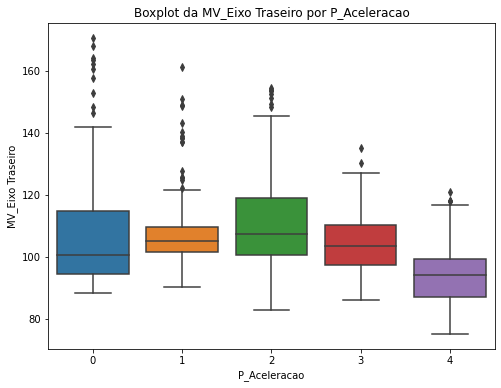

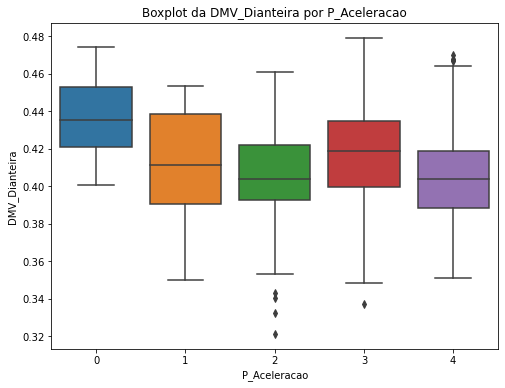

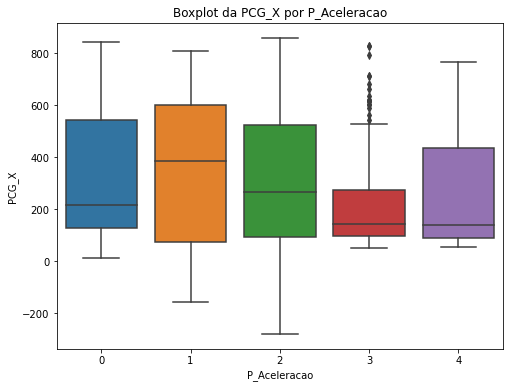

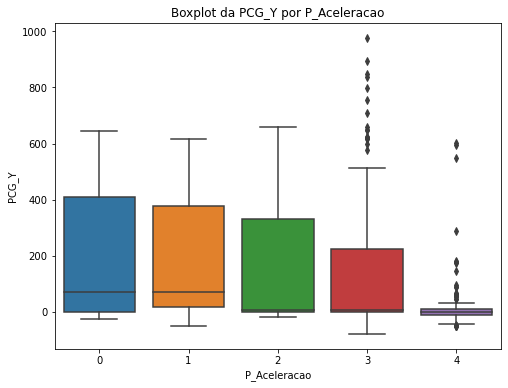

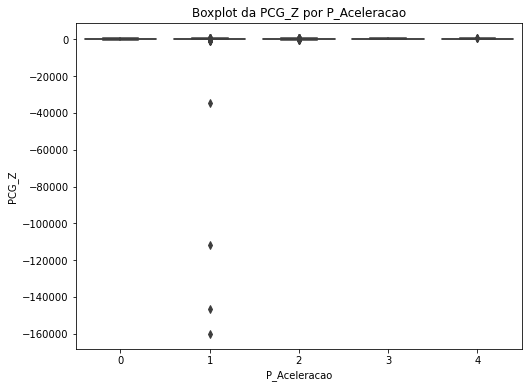

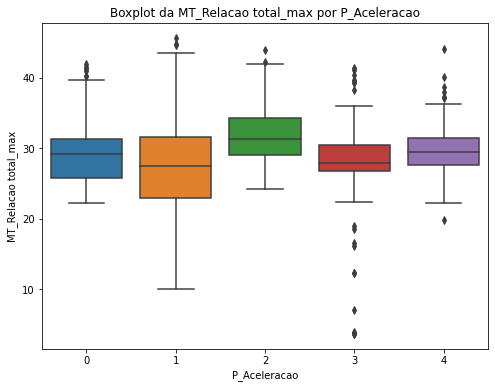

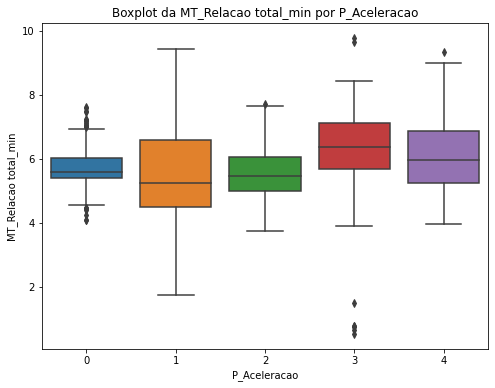

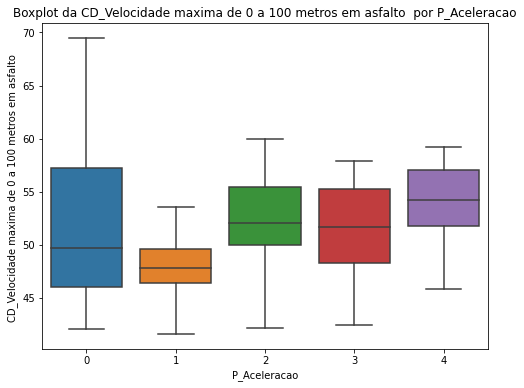

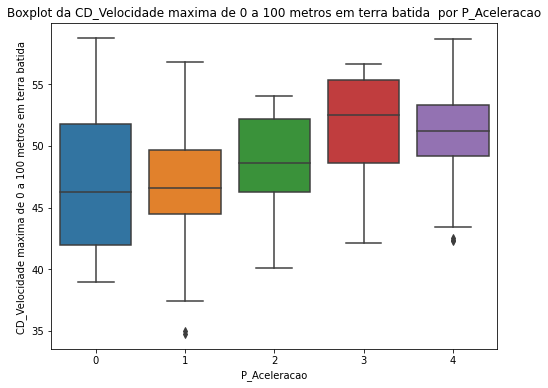

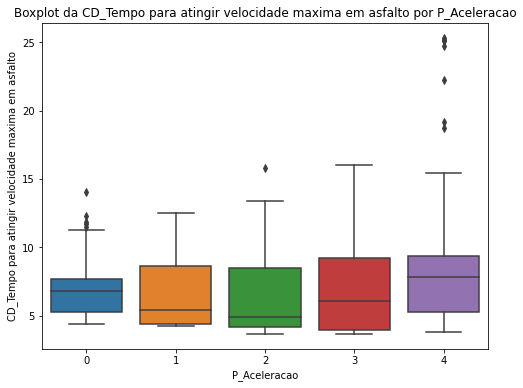

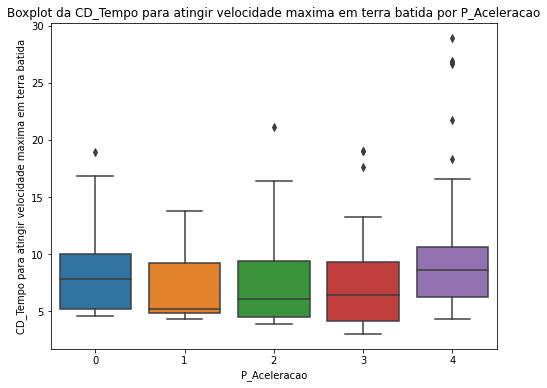

In [14]:
# Boxplots por Classes
for coluna in df.columns:
    if coluna != 'P_Aceleracao':  # Excluindo a coluna de classe das análises
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='P_Aceleracao', y=coluna, data=df)
        plt.title(f'Boxplot da {coluna} por P_Aceleracao')
        plt.ylabel(coluna)
        plt.xlabel('P_Aceleracao')
        plt.show()

In [15]:
# Tratar Outliers e valores nulos
colunas_a_tratar = df.columns.difference(['P_Aceleracao']) # Lista das colunas a serem tratadas 


# Lista das classes únicas na coluna 'Classe'
classes_unicas = df['P_Aceleracao'].unique()

# Função para tratar uma coluna específica em uma classe
def tratar_coluna_para_classe(data, classe, coluna):
    dados_classe = data[data['P_Aceleracao'] == classe]
    
    # Calcula a mediana dos valores não nulos da coluna para esta classe
    mediana = dados_classe[coluna].median()
    
    # Calcula o desvio padrão dos valores não nulos da coluna para esta classe
    desvio_padrao = dados_classe[coluna].std()
    
    # Define o limite superior e inferior com base no desvio padrão
    limite_superior = mediana + (2 * desvio_padrao)
    limite_inferior = mediana - (2 * desvio_padrao)
    
    # Substitui os valores que são nulos ou estão fora do limite pelo valor da mediana
    dados_classe[coluna] = dados_classe[coluna].apply(lambda x: mediana if pd.isna(x) or x > limite_superior or x < limite_inferior else x)
    
    return dados_classe

# Loop para tratar todas as colunas para cada classe
dados_tratados = []
for classe in classes_unicas:
    dados_classe = df[df['P_Aceleracao'] == classe].copy()  # Crie uma cópia dos dados da classe
    for coluna in colunas_a_tratar:
        dados_classe = tratar_coluna_para_classe(dados_classe, classe, coluna)
    dados_tratados.append(dados_classe)

# Concatena os dados tratados de volta em um único DataFrame
df_tratado = pd.concat(dados_tratados)

print(df_tratado)

     MV_Eixo dianteiro  MV_Eixo Traseiro  DMV_Dianteira       PCG_X  \
0            77.103974         95.577887       0.454945  208.702782   
1            71.061984         91.039134       0.409187  514.604278   
2            72.050229         93.021177       0.415841  491.093155   
3           102.342058        100.491972       0.434121   85.197422   
4            84.700554        102.049056       0.457152  368.632469   
..                 ...               ...            ...         ...   
992          65.232887         93.529321       0.404373   96.678853   
995          72.221809         90.226812       0.441886  107.916108   
996          70.709528         98.908065       0.401583   69.576836   
997          60.558489        107.230112       0.352453  523.000000   
998          69.774043         96.836258       0.410884  109.438324   

          PCG_Y       PCG_Z  MT_Relacao total_max  MT_Relacao total_min  \
0    -22.463140  198.449195             27.844530              5.094629 

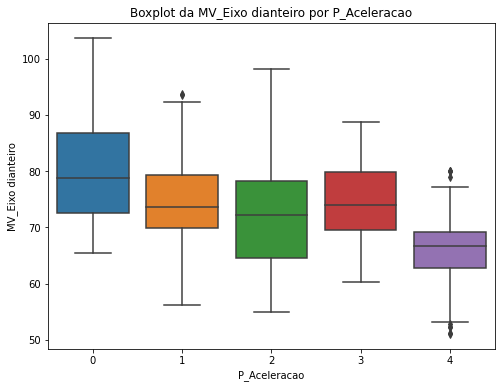

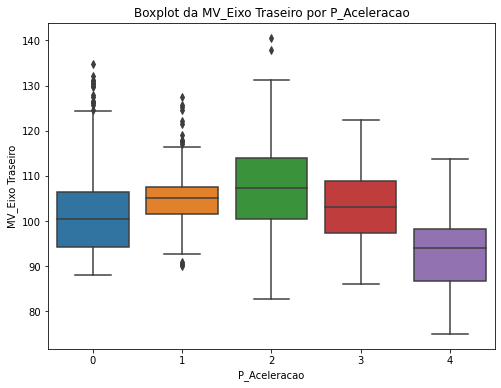

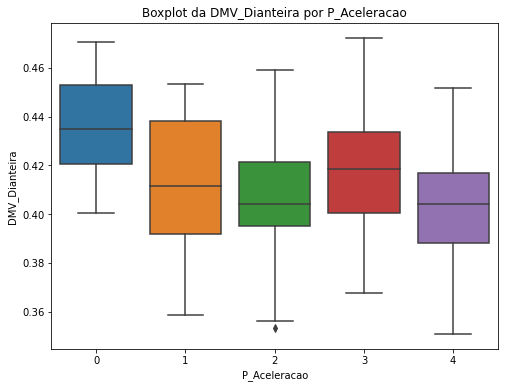

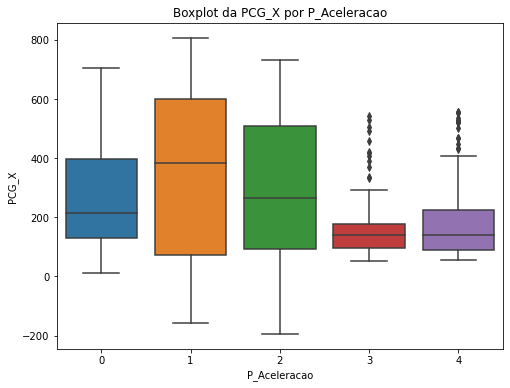

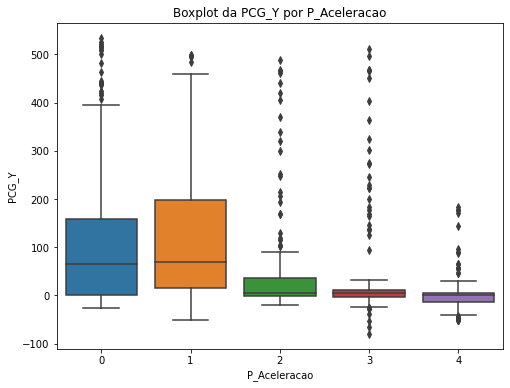

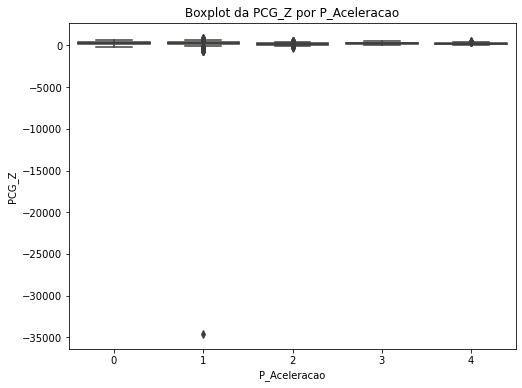

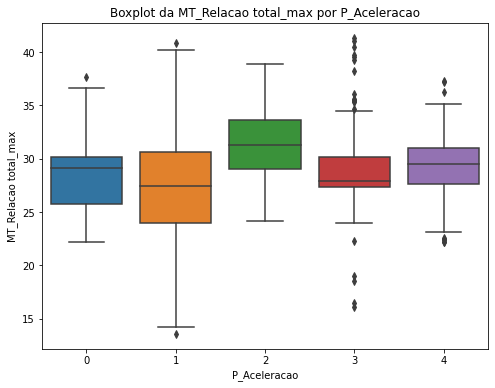

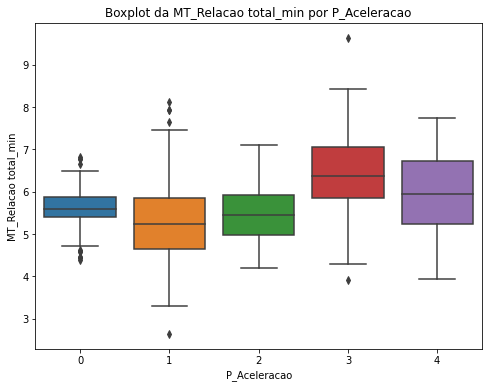

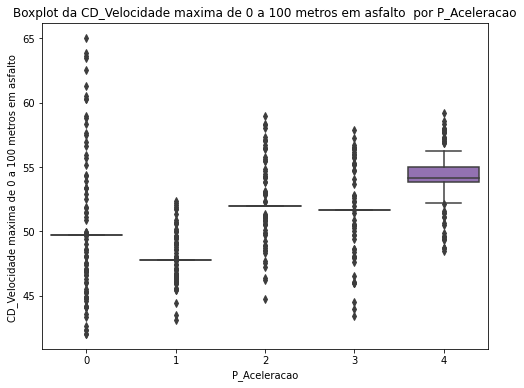

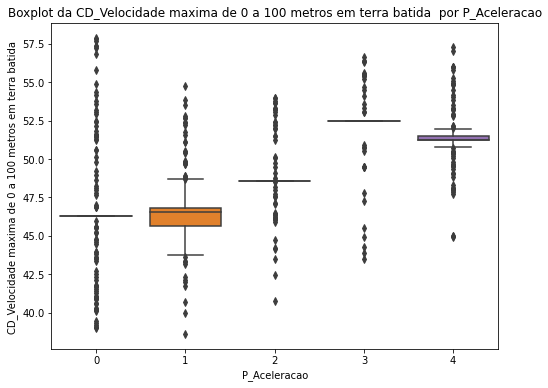

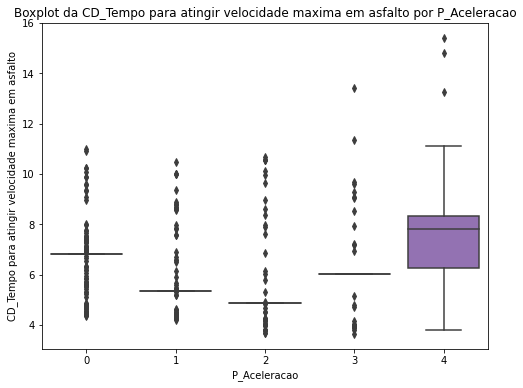

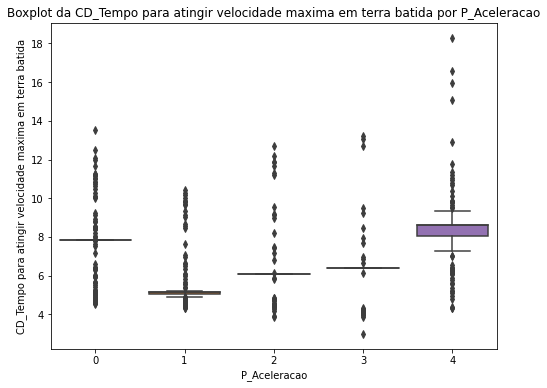

In [16]:
# Boxplots por Classes
for coluna in df_tratado.columns:
    if coluna != 'P_Aceleracao':  # Excluindo a coluna de classe das análises
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='P_Aceleracao', y=coluna, data=df_tratado)
        plt.title(f'Boxplot da {coluna} por P_Aceleracao')
        plt.ylabel(coluna)
        plt.xlabel('P_Aceleracao')
        plt.show()

In [17]:
df = df_tratado

In [18]:
# Especifique o caminho para o arquivo Excel
caminho_arquivo = "C:\\Users\\Andre\\Desktop\\Julia\\Mangue_Baja\\DESAFIO TÉCNICO\\Arquivo_Processado_semO.xlsx"

# Salvar o DataFrame na planilha 'P_Aceleration'
df.to_excel(caminho_arquivo, sheet_name='P_Aceleration', index=0)

## Análise de Variáveis

In [19]:
data_corr = df.drop(['P_Aceleracao'], axis=1)
# Análise de correlação dos parâmetros
correlation = df.corr()

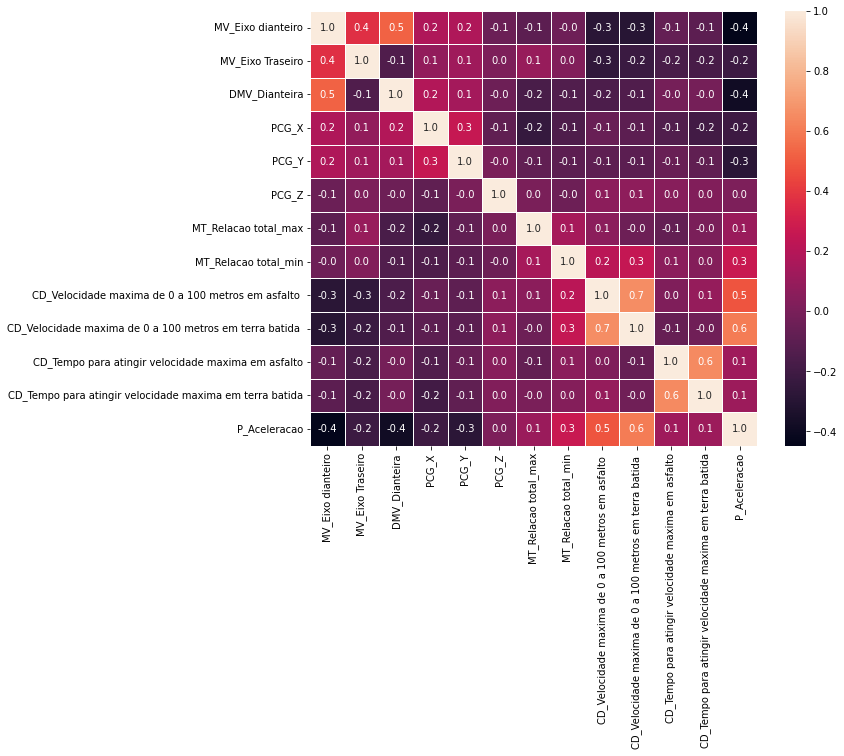

In [20]:
# Plot da matriz de correlação
plt.figure(figsize=(10, 8))

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=0.5)
plt.show()

In [21]:
# Aplicar PCA para reduzir variáveis de alta correlação - Massa
variaveis_reduzidas = df[['MV_Eixo dianteiro', 'MV_Eixo Traseiro']]

pca = PCA(n_components=1)
variavel_reduzida = pca.fit_transform(variaveis_reduzidas)

# Remove as colunas reduzidas
colunas_a_remover = [
    'MV_Eixo dianteiro',
    'MV_Eixo Traseiro',
]

df = df.drop(colunas_a_remover, axis=1)

# Escolha a posição (índice) onde deseja inserir a nova coluna
posicao_desejada = 0

# Insira a nova coluna no DataFrame na posição desejada
df.insert(posicao_desejada, 'Massa', variavel_reduzida)

print(df)

         Massa  DMV_Dianteira       PCG_X       PCG_Y       PCG_Z  \
0    -3.426353       0.454945  208.702782  -22.463140  198.449195   
1   -10.744310       0.409187  514.604278   69.508500  630.194867   
2    -8.579091       0.415841  491.093155  378.006613  265.328190   
3    16.171583       0.434121   85.197422   -2.070284  288.244467   
4     6.371711       0.457152  368.632469   69.508500   39.025558   
..         ...            ...         ...         ...         ...   
992 -12.439217       0.404373   96.678853    0.957613  150.095634   
995 -10.654551       0.441886  107.916108    6.642557  170.670043   
996  -4.818193       0.401583   69.576836    2.948500  213.702451   
997  -4.656790       0.352453  523.000000  -50.000000  189.770000   
998  -7.020579       0.410884  109.438324    9.533358  112.004513   

     MT_Relacao total_max  MT_Relacao total_min  \
0               27.844530              5.094629   
1               36.113022              5.714850   
2               29

In [22]:
# Aplicar PCA para reduzir variáveis de alta correlação - Velocidade em 100 m
variaveis_reduzidas = df[['CD_Velocidade maxima de 0 a 100 metros em asfalto ', 'CD_Velocidade maxima de 0 a 100 metros em terra batida ']]

pca = PCA(n_components=1)
variavel_reduzida = pca.fit_transform(variaveis_reduzidas)

# Remove as colunas reduzidas
colunas_a_remover = [
    'CD_Velocidade maxima de 0 a 100 metros em asfalto ',
    'CD_Velocidade maxima de 0 a 100 metros em terra batida '
]

df = df.drop(colunas_a_remover, axis=1)

# Escolha a posição (índice) onde deseja inserir a nova coluna
posicao_desejada = 7

# Insira a nova coluna no DataFrame na posição desejada
df.insert(posicao_desejada, 'CD_Velocidade em 100 m', variavel_reduzida)

print(df)

         Massa  DMV_Dianteira       PCG_X       PCG_Y       PCG_Z  \
0    -3.426353       0.454945  208.702782  -22.463140  198.449195   
1   -10.744310       0.409187  514.604278   69.508500  630.194867   
2    -8.579091       0.415841  491.093155  378.006613  265.328190   
3    16.171583       0.434121   85.197422   -2.070284  288.244467   
4     6.371711       0.457152  368.632469   69.508500   39.025558   
..         ...            ...         ...         ...         ...   
992 -12.439217       0.404373   96.678853    0.957613  150.095634   
995 -10.654551       0.441886  107.916108    6.642557  170.670043   
996  -4.818193       0.401583   69.576836    2.948500  213.702451   
997  -4.656790       0.352453  523.000000  -50.000000  189.770000   
998  -7.020579       0.410884  109.438324    9.533358  112.004513   

     MT_Relacao total_max  MT_Relacao total_min  CD_Velocidade em 100 m  \
0               27.844530              5.094629               -2.619119   
1               36.11

In [23]:
# Aplicar PCA para reduzir variáveis de alta correlação - Tempo para atingir velocidade maxima
variaveis_reduzidas = df[['CD_Tempo para atingir velocidade maxima em asfalto', 'CD_Tempo para atingir velocidade maxima em terra batida']]

pca = PCA(n_components=1)
variavel_reduzida = pca.fit_transform(variaveis_reduzidas)

# Remove as colunas reduzidas
colunas_a_remover = [
    'CD_Tempo para atingir velocidade maxima em asfalto',
    'CD_Tempo para atingir velocidade maxima em terra batida'
]

df = df.drop(colunas_a_remover, axis=1)

# Escolha a posição (índice) onde deseja inserir a nova coluna
posicao_desejada = 8

# Insira a nova coluna no DataFrame na posição desejada
df.insert(posicao_desejada, 'CD_Tempo para atingir velocidade maxima', variavel_reduzida)

print(df)

         Massa  DMV_Dianteira       PCG_X       PCG_Y       PCG_Z  \
0    -3.426353       0.454945  208.702782  -22.463140  198.449195   
1   -10.744310       0.409187  514.604278   69.508500  630.194867   
2    -8.579091       0.415841  491.093155  378.006613  265.328190   
3    16.171583       0.434121   85.197422   -2.070284  288.244467   
4     6.371711       0.457152  368.632469   69.508500   39.025558   
..         ...            ...         ...         ...         ...   
992 -12.439217       0.404373   96.678853    0.957613  150.095634   
995 -10.654551       0.441886  107.916108    6.642557  170.670043   
996  -4.818193       0.401583   69.576836    2.948500  213.702451   
997  -4.656790       0.352453  523.000000  -50.000000  189.770000   
998  -7.020579       0.410884  109.438324    9.533358  112.004513   

     MT_Relacao total_max  MT_Relacao total_min  CD_Velocidade em 100 m  \
0               27.844530              5.094629               -2.619119   
1               36.11

In [68]:
# Dividir o conjunto de dados em treinamento e teste
dados_treino, dados_teste = train_test_split(df, test_size=0.3)

# Separar X e Y
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

X_treino = dados_treino.iloc[:, :-1]
Y_treino = dados_treino.iloc[:, -1]

X_teste = dados_teste.iloc[:, :-1]
Y_teste = dados_teste.iloc[:, -1]

print(Y_teste)

17     0
338    1
733    3
319    1
836    4
      ..
30     0
701    3
717    3
184    0
854    4
Name: P_Aceleracao, Length: 221, dtype: int64


# Escolha do Modelo

## Regressão Logística:

In [69]:
# Modelo de regressão logística.
model_LR = LogisticRegression()
model_LR.fit(X_treino, Y_treino)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [70]:
# Avaliação do desempenho do modelo.
Y_pred = model_LR.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Regressão Logística:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

Desempenho para Regressão Logística:
Acurácia: 0.48
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.44      0.47      0.46        55
           1       0.46      0.37      0.41        52
           2       0.61      0.27      0.37        41
           3       0.47      0.52      0.49        42
           4       0.48      0.87      0.62        31

    accuracy                           0.48       221
   macro avg       0.49      0.50      0.47       221
weighted avg       0.49      0.48      0.46       221



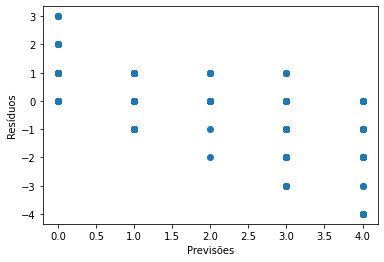

In [71]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Máquinas de Vetores de Suporte (SVM)

In [72]:
# Modelo SVM com um kernel linear e "um contra todos"
model_SVM = SVC(kernel='linear', decision_function_shape='ovr')
model_SVM.fit(X_treino, Y_treino)

SVC(kernel='linear')

In [73]:
# Avaliação do desempenho do modelo.
Y_pred = model_SVM.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Máquinas de Vetores de Suporte:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

Desempenho para Máquinas de Vetores de Suporte:
Acurácia: 0.76
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        55
           1       0.79      0.79      0.79        52
           2       0.77      0.59      0.67        41
           3       0.74      0.67      0.70        42
           4       0.69      0.94      0.79        31

    accuracy                           0.76       221
   macro avg       0.75      0.76      0.75       221
weighted avg       0.76      0.76      0.75       221



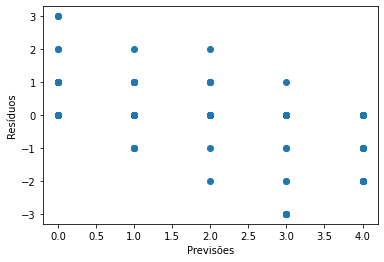

In [74]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## K-Nearest Neighbors

In [75]:
k = 3  # Número de vizinhos (Altere por necessidade)

# Modelo de K-Vizinhos Mais Próximos (K-Nearest Neighbors - KNN).
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_treino, Y_treino)

KNeighborsClassifier(n_neighbors=3)

In [76]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_KNN.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para K-Vizinhos Mais Próximos:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

Desempenho para K-Vizinhos Mais Próximos:
Acurácia: 0.57
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.47      0.73      0.57        55
           1       0.75      0.58      0.65        52
           2       0.54      0.32      0.40        41
           3       0.63      0.52      0.57        42
           4       0.58      0.68      0.63        31

    accuracy                           0.57       221
   macro avg       0.59      0.56      0.56       221
weighted avg       0.59      0.57      0.57       221



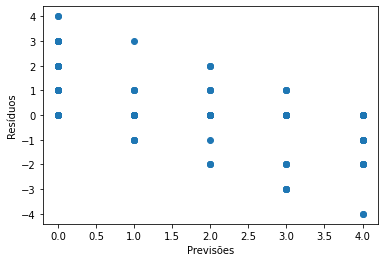

In [77]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Decision Tree Classifier

In [78]:
# Modelo de Árvore de Decisão de Classificação.
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_treino, Y_treino)

DecisionTreeClassifier()

In [79]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_DTC.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Árvore de Decisão de Classificação:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

Desempenho para Árvore de Decisão de Classificação:
Acurácia: 0.83
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        55
           1       0.87      0.79      0.83        52
           2       0.72      0.71      0.72        41
           3       0.95      0.88      0.91        42
           4       0.76      0.90      0.82        31

    accuracy                           0.83       221
   macro avg       0.83      0.83      0.83       221
weighted avg       0.84      0.83      0.83       221



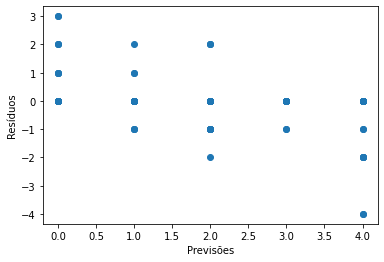

In [80]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Random Forest Classifier

In [81]:
# Modelo de Regressão de Floresta Aleatória.
model_RFC = RandomForestClassifier()
model_RFC.fit(X_treino, Y_treino)

RandomForestClassifier()

In [82]:
# Avaliação do desempenho do modelo.
Y_pred = model_RFC.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Regressão de Floresta Aleatória:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

Desempenho para Regressão de Floresta Aleatória:
Acurácia: 0.93
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.94      0.96      0.95        52
           2       0.97      0.85      0.91        41
           3       0.93      0.93      0.93        42
           4       0.91      0.94      0.92        31

    accuracy                           0.93       221
   macro avg       0.93      0.93      0.93       221
weighted avg       0.93      0.93      0.93       221



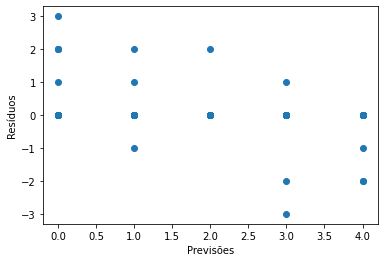

In [83]:
# Analisar os resíduos.
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

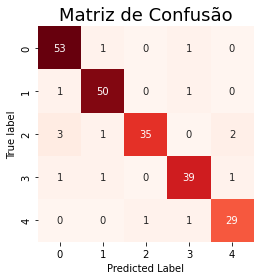

In [84]:
# Matriz de Confusão
#Y_pred = cross_val_predict(model_XGB, X_treino, Y_treino, cv=kfold) # Checar Modelo

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_teste, Y_pred), annot=True, ax=ax, fmt='d', cmap='Reds', cbar=False, square=True)
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

## XGBoost

In [85]:
# Modelo de Extreme Gradient Boosting.
model_XGB = XGBClassifier()
model_XGB.fit(X_treino, Y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [86]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

Desempenho para Extreme Gradient Boosting:
Acurácia: 0.93
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.93      0.96      0.94        52
           2       0.95      0.88      0.91        41
           3       0.91      0.95      0.93        42
           4       0.90      0.90      0.90        31

    accuracy                           0.93       221
   macro avg       0.93      0.93      0.93       221
weighted avg       0.93      0.93      0.93       221



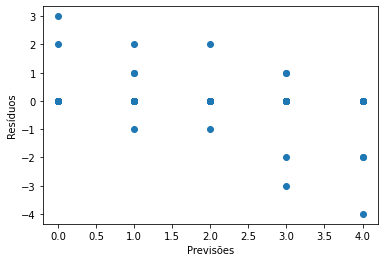

In [87]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

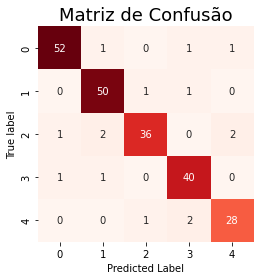

In [88]:
# Matriz de Confusão
#Y_pred = cross_val_predict(model_XGB, X_treino, Y_treino, cv=kfold) # Checar Modelo

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_teste, Y_pred), annot=True, ax=ax, fmt='d', cmap='Reds', cbar=False, square=True)
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

# Treinamento do Modelo

## Bootstraps

In [91]:
n_iterations = 100  # Número de iterações do Bootstrap

# Lista para armazenar as métricas de desempenho em cada iteração
performance_metrics = []

for _ in range(n_iterations):
    # Amostragem Bootstrap: crie um conjunto de treinamento com reamostragem
    indices_amostra = np.random.choice(len(X_treino), size=len(X_treino), replace=True)
    X_bootstrap = X_treino.iloc[indices_amostra]  
    y_bootstrap = Y_treino.iloc[indices_amostra]

    # Crie e treine seu modelo
    model_XGB.fit(X_bootstrap, y_bootstrap)

    # Avalie o modelo no conjunto de teste
    desempenho = model_XGB.score(X_teste, Y_teste)  # Mede a acurácia
    performance_metrics.append(desempenho)

In [92]:
# Calcule as métricas resumidas (por exemplo, média e desvio padrão)
media_desempenho = np.mean(performance_metrics)
desvio_padrao_desempenho = np.std(performance_metrics)

# Imprima as métricas resumidas
print(f'Média do desempenho: {media_desempenho:.4f}')
print(f'Desvio Padrão do desempenho: {desvio_padrao_desempenho:.4f}')

Média do desempenho: 0.9165
Desvio Padrão do desempenho: 0.0155


# Avaliação do Modelo

## Cross-Validation

In [98]:
# Número de classes
n_classes = 5

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [99]:
# Calcule a média das pontuações para avaliação de Acurácia do modelo
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean * 100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100))

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='accuracy') # Checar Modelo
intervalo(scores)

Acurácia média: 89.50%
Intervalo de acurácia: [83.59% ~ 95.41%]


In [100]:
# Calcule a média das pontuações para avaliação de Precisão do modelo
def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean * 100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100))

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='precision_macro') # Checar Modelo
intervalo_prec(scores)

Precisão média: 90.24%
Intervalo de acurácia: [82.91% ~ 97.56%]


In [101]:
# Calcule a média das pontuações para avaliação de Recall do modelo
def intervalo_recall(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean * 100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100))

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='recall_macro') # Checar Modelo
intervalo_recall(scores)

Recall médio: 88.81%
Intervalo de acurácia: [83.50% ~ 94.11%]


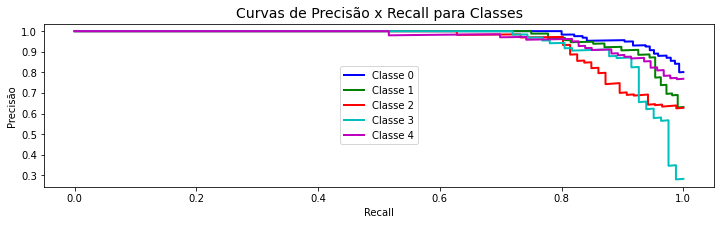

In [102]:
# Comparar scores de Previsão e Recall
# Converta Y_treino para uma matriz binária de classes
Y_bin = label_binarize(Y_treino, classes=list(range(5)))

# Obter as probabilidades em vez das previsões
y_scores = cross_val_predict(model_XGB, X_treino, Y_treino, cv=kfold, method='predict_proba')

# Calcula as curvas de precisão e recall para cada classe
precisions = dict()
recalls = dict()
for i in range(5):
    precision, recall, _ = precision_recall_curve(Y_bin[:, i], y_scores[:, i])
    precisions[i] = precision
    recalls[i] = recall

# Plote as curvas de precisão e recall para cada classe
fig, ax = plt.subplots(figsize=(12, 3))
colors = ['b', 'g', 'r', 'c', 'm']
for i, color in zip(range(5), colors):
    plt.plot(recalls[i], precisions[i], color, lw=2, label='Classe {}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.legend(loc='center')
plt.title('Curvas de Precisão x Recall para Classes', fontsize=14)
plt.show()

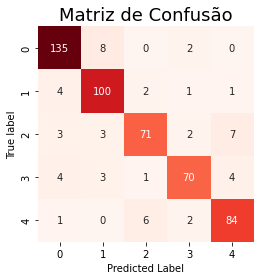

In [103]:
# Matriz de Confusão
Y_pred = cross_val_predict(model_XGB, X_treino, Y_treino, cv=kfold) # Checar Modelo

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_treino, Y_pred), annot=True, ax=ax, fmt='d', cmap='Reds', cbar=False, square=True)
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [104]:
# Relatório do modelo
print('Relatório de classificação:\n', classification_report(Y_treino, Y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9184    0.9310    0.9247       145
           1     0.8772    0.9259    0.9009       108
           2     0.8875    0.8256    0.8554        86
           3     0.9091    0.8537    0.8805        82
           4     0.8750    0.9032    0.8889        93

    accuracy                         0.8949       514
   macro avg     0.8934    0.8879    0.8901       514
weighted avg     0.8952    0.8949    0.8946       514



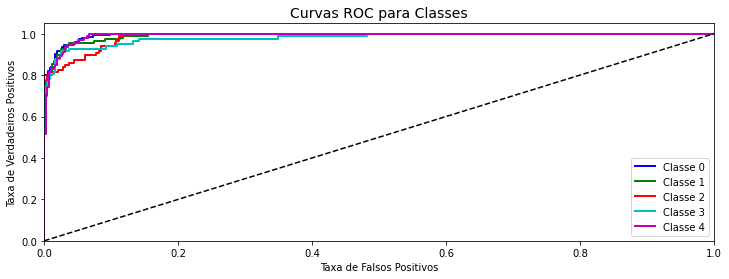

In [105]:
# Receiver operating characteristic — ROC

# Converta Y_treino para uma matriz binária de classes
Y_bin = label_binarize(Y_treino, classes=list(range(5)))

# Calcula as curvas ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(Y_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plote as curvas ROC para cada classe
fig, ax = plt.subplots(figsize=(12, 4))
colors = ['b', 'g', 'r', 'c', 'm']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color, lw=2, label='Classe {}'.format(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.title('Curvas ROC para Classes', fontsize=14)
plt.show()

In [106]:
# Área sob a Curva
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(Y_treino, y_scores, multi_class='ovr', average='macro')))

Área sob a curva ROC: 0.9891


In [107]:
# Treinamento do modelo 
#model_XGB.fit(X_treino, Y_treino) # Checar modelo

# Fazer previsões no conjunto de teste
Y_pred_teste = model_XGB.predict(X_teste)

# Acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, Y_pred_teste)
print('Acurácia no conjunto de teste: {:.2f}%'.format(accuracy * 100))

# Precisão no conjunto de teste
precision = precision_score(Y_teste, Y_pred_teste, average='macro')
print('Precisão no conjunto de teste: {:.2f}%'.format(precision * 100))

# Recall no conjunto de teste
recall = recall_score(Y_teste, Y_pred_teste, average='macro')
print('Recall no conjunto de teste: {:.2f}%'.format(recall * 100))

# Relatório de classificação no conjunto de teste
print('Relatório de classificação no conjunto de teste:\n', classification_report(Y_teste, Y_pred_teste, digits=4))

Acurácia no conjunto de teste: 92.31%
Precisão no conjunto de teste: 92.44%
Recall no conjunto de teste: 92.01%
Relatório de classificação no conjunto de teste:
               precision    recall  f1-score   support

           0     0.8966    0.9455    0.9204        55
           1     0.9615    0.9615    0.9615        52
           2     0.9714    0.8293    0.8947        41
           3     0.8864    0.9286    0.9070        42
           4     0.9062    0.9355    0.9206        31

    accuracy                         0.9231       221
   macro avg     0.9244    0.9201    0.9208       221
weighted avg     0.9252    0.9231    0.9228       221



## Análise de Variáveis 

In [108]:
# Analisar variáveis que mais afetam o modelo
importances = model_XGB.feature_importances_

# Classifique as importâncias das características
indices_ordenados = np.argsort(importances)[::-1]

print(importances)

[0.10171396 0.06577304 0.05255048 0.09541094 0.05294798 0.02910317
 0.06947056 0.24375153 0.28927836]


<Figure size 1440x1152 with 0 Axes>

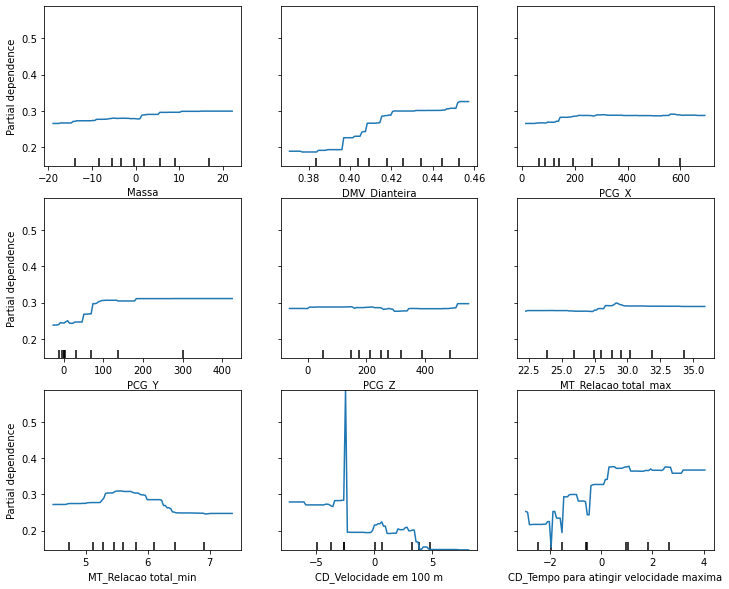

In [109]:
# Analisar como uma variável afeta as previsões
colunas = df.columns[:-1].tolist() # Separar as variáveis

plt.figure(figsize=(20, 16))

# Crie PDPs para as variáveis escolhidas
plot_partial_dependence(model_XGB, X_treino, features=colunas, target=Y_treino.all(), grid_resolution=100)

# Obter a figura atual e definir o tamanho
fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.show()

[20:53:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
 96%|=================== | 1063/1105 [00:18<00:00]       

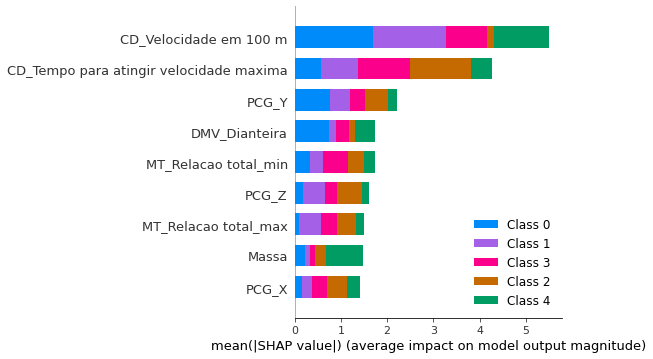

In [110]:
# Crie um objeto explainer
explainer = shap.Explainer(model_XGB, X_treino)

# Calcule os valores Shapley para um exemplo de dado específico
shap_values = explainer.shap_values(X_teste)

# Visualize os valores Shapley
shap.summary_plot(shap_values, X_teste)

# Aprimoramento de Parâmetros

## Tuning

In [ ]:
# Exemplo de Tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'max_depth': [3, 4, 5],         # Profundidade máxima das árvores
    'learning_rate': [0.1, 0.01],   # Taxa de aprendizado
    'subsample': [0.8, 0.9, 1.0],   # Fração de amostras usadas para treinamento de cada árvore
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fração de colunas usadas para treinamento de cada árvore
    'min_child_weight': [1, 5, 10],  # Peso mínimo das amostras necessárias em uma folha
    'gamma': [0, 0.1, 0.2],         # Regularização gamma (parâmetro de penalização)
    'reg_alpha': [0, 0.1, 0.2],     # Regularização L1 (parâmetro de penalização)
    'reg_lambda': [1, 1.1, 1.2]     # Regularização L2 (parâmetro de penalização)
}

grid_search = GridSearchCV(estimator=model_XGB, param_grid=param_grid, cv=5)

grid_search.fit(X_treino, Y_treino)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
# Guardar os parâmetros encontrados fora do código
melhores_parametros = grid_search.best_params_

# Salvar os melhores parâmetros em um arquivo
joblib.dump(melhores_parametros, 'melhores_parametros_acel.pkl')

# Carregar os melhores parâmetros a partir do arquivo
#melhores_parametros = joblib.load('melhores_parametros_sus.pkl')

In [ ]:
# Ajustar um modelo de XGBoost
model_XGB.fit(X_treino, Y_treino)

# Configure o modelo com os melhores parâmetros
model_XGB.set_params(**best_params)

In [ ]:
# Avaliação do desempenho do modelo 
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

## Redução de Dimensão

In [ ]:
# Selecione um número específico de características mais importantes
num_caracteristicas_selecionadas = 3  # Por exemplo, selecione as 3 mais importantes

X_treino_selecionado = X_treino[:, indices_ordenados[:num_caracteristicas_selecionadas]]
X_teste_selecionado = X_teste[:, indices_ordenados[:num_caracteristicas_selecionadas]]

# Em seguida, treine seu modelo no conjunto de dados com características selecionadas
model_XGB.fit(X_treino_selecionado, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

# Predição

In [ ]:
# Valor único para fazer a previsão
X_prev = np.array([6]).reshape(-1, 1) # Colocar os valores pedidos

# Faça a previsão
previsao = modelo_carregado.predict(X_prev)

# Imprima a previsão
print(f'A previsão para X_prev é: {previsao[0]:.2f}')